##### Model aims to:
Predict what the cloth piece image is (shirt, shoes, skirt etc.)
##### Data used:
Dataset of 70,000 images of size 28*28 that will be loaded using the fashion dataset on tensorflow

 ##### Importing and Preparing Data :

In [2]:

import tensorflow as tf 

fashion_minst = tf.keras.datasets.fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_minst.load_data()
print("done!")



done!


Label:  2
Image pixel array: 
 [[  0   0   0   0   1   0   0   0   0  22  88 188 172 132 125 141 199 143   9   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0  20 131 199 206 196 202 242 255 255 250 222 197 206 188 126  17   0   0   0   0   0   0]
 [  0   0   0   1   0  35 214 191 183 178 175 168 150 162 159 152 158 179 183 189 195 185  82   0   0   0   0   0]
 [  0   0   0   0   0 170 190 172 177 176 171 169 162 155 148 154 169 174 175 175 177 183 188  12   0   0   0   0]
 [  0   0   0   0  25 194 180 178 174 184 187 189 187 184 181 189 200 197 193 190 178 175 194  90   0   0   0   0]
 [  0   0   0   0  42 218 191 197 208 204 211 209 210 212 211 214 215 213 214 211 211 191 200 158   0   0   0   0]
 [  0   0   0   0  88 221 215 217 219 211 185 150 118 107  99  88  83  90 135 212 203 207 219 169   0   0   0   0]
 [  0   0   0   0   0  27 118 162  40   0   0   0  10  19  28  39  47  36   0   0 203 230 220 203   0   0   0   0]
 [  0   0   0   0 138 136  71  69  54 216 217 203

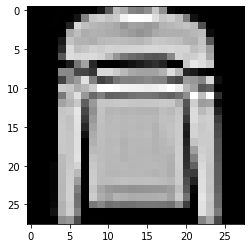

In [3]:
#showing a sample of our training data
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

index = 5 

np.set_printoptions(linewidth=320)

print("Label: ",train_labels[index])
print("Image pixel array: \n",train_data[index])

plt.imshow(train_data[index], cmap='gray')

In [4]:
#normalizing data
train_images = train_data/255
test_images = test_data/255

Label:  2
Image pixel array: 
 [[0.         0.         0.         0.         0.00392157 0.         0.         0.         0.         0.08627451 0.34509804 0.7372549  0.6745098  0.51764706 0.49019608 0.55294118 0.78039216 0.56078431 0.03529412 0.         0.         0.         0.00392157 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.         0.07843137 0.51372549 0.78039216 0.80784314 0.76862745 0.79215686 0.94901961 1.         1.         0.98039216 0.87058824 0.77254902 0.80784314 0.7372549  0.49411765 0.06666667 0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.1372549  0.83921569 0.74901961 0.71764706 0.69803922 0.68627451 0.65882353 0.58823529 0.63529412 0.62352941 0.59607843 0.61960784 0.70196078 0.71764706 0.74117647 0.76470588 0.7254902  0.32156863 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0

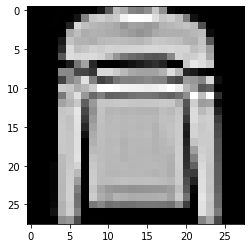

In [5]:
#showing a sample after normalization (of course normalization is supposed to ease the task to the model not to us)
print("Label: ",train_labels[index])
print("Image pixel array: \n",train_images[index])

plt.imshow(train_images[index], cmap='gray')

##### Building The Model :

In [6]:
from keras import models, layers

In [7]:
model = models.Sequential()
#addding layers
model.add(layers.Flatten())
model.add(layers.Dense(128,activation=tf.nn.relu))
model.add(layers.Dense(10,activation=tf.nn.softmax))



##### Compiling & Testing the model :

In [8]:
model.compile(optimizer=tf.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [9]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


In [ ]:
#evaluting the model on testing data
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.8817


[0.33918553590774536, 0.8816999793052673]

In [ ]:
predictions = model.predict(test_images)

my_predictions = [np.argmax(predictions[i]) for i in range(100,121)]
my_predictions

[3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0]

In [ ]:
test_labels[100:121]

array([3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0], dtype=uint8)